In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use('seaborn-whitegrid')

# 1- Problem Statement

###  Domain: Health Insurance
-  Data Description:
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are - relatively high or low relative to height, objective index of body weight (kg /  m2
 ) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non - smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance.

# 1. Data Reading & Understanding

In [2]:
df = pd.read_csv("insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# 2. Check for Dtypes

In [6]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtypes,int64,object,float64,int64,object,object,float64
N_Uniq,47,2,548,6,2,4,1337


In [7]:
cat_cols = ['sex', 'children', 'smoker', 'region']
df[cat_cols] = df[cat_cols].astype("category")

In [8]:
pd.DataFrame(df.dtypes).T

,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,category,category,category,float64


# 3. Null Values

In [9]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


In [35]:
import missingno as msno

## Bar chart
- Bar chart displays a count of values present per columns ignoring missing values.

<Axes: >

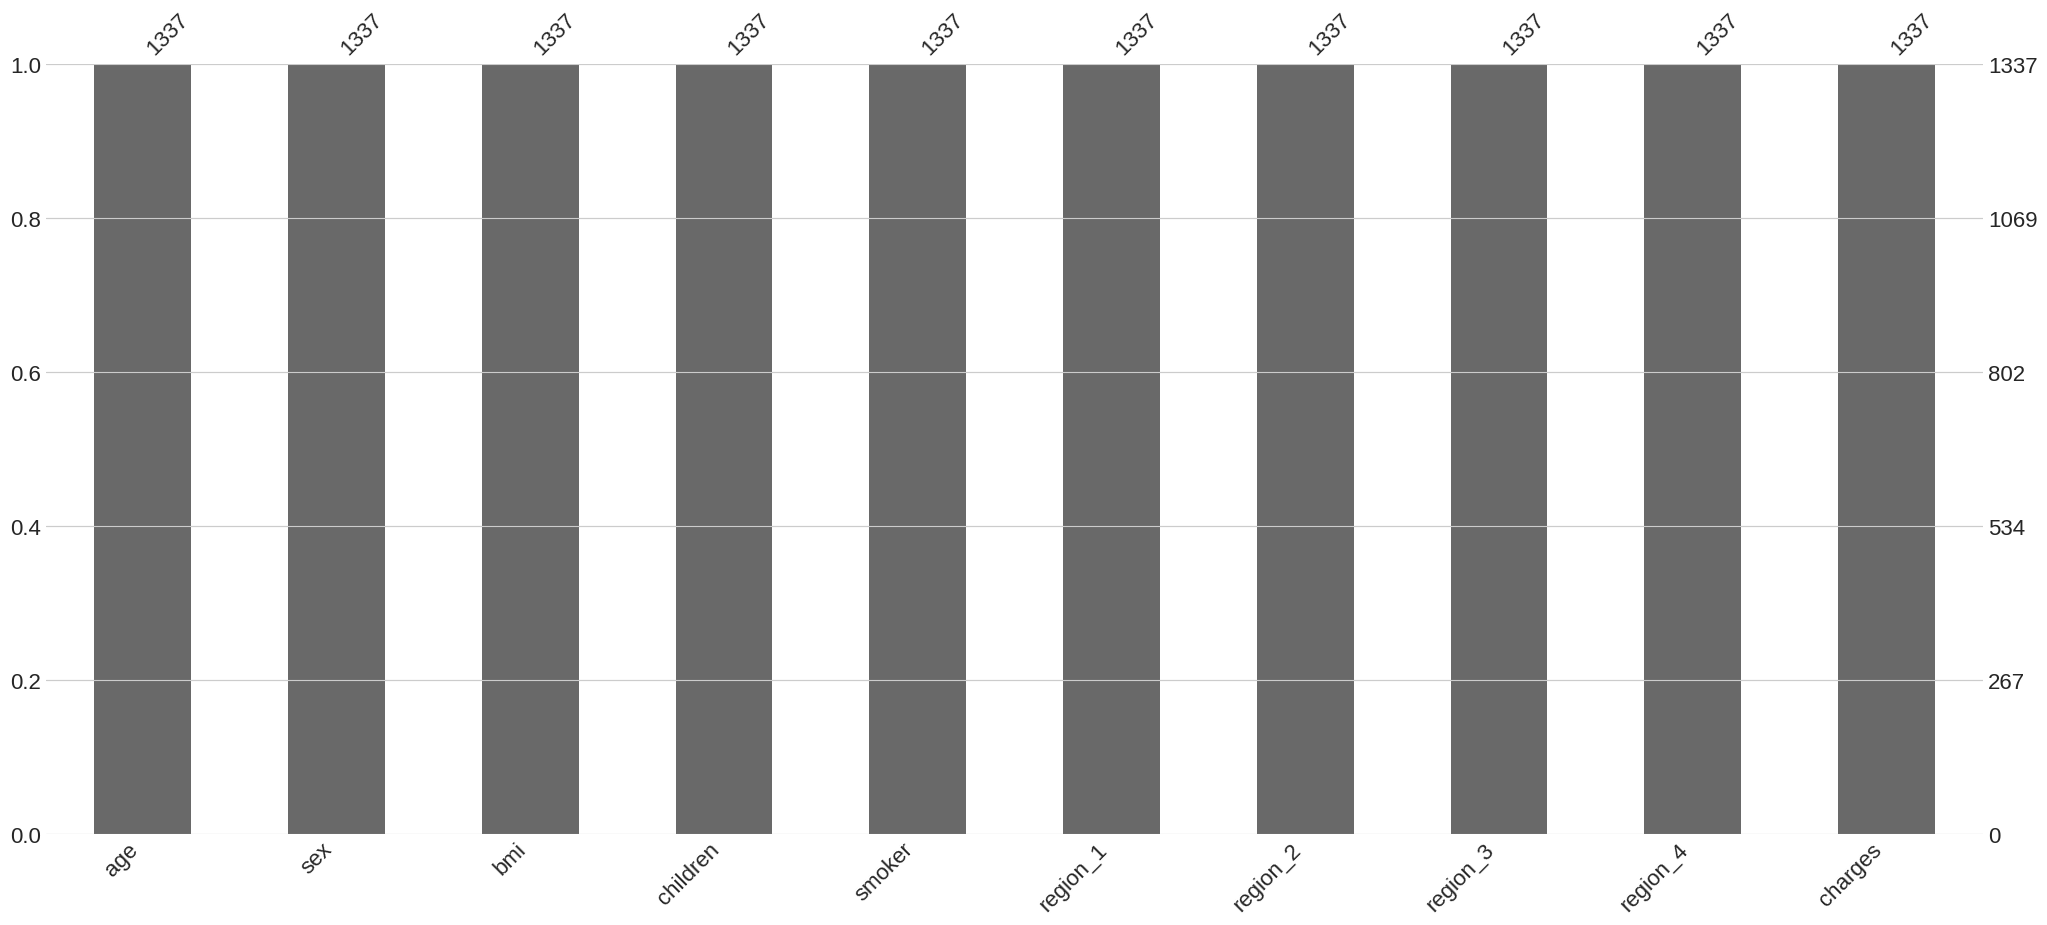

In [36]:
msno.bar(df)


## Matrix
- It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

<Axes: >

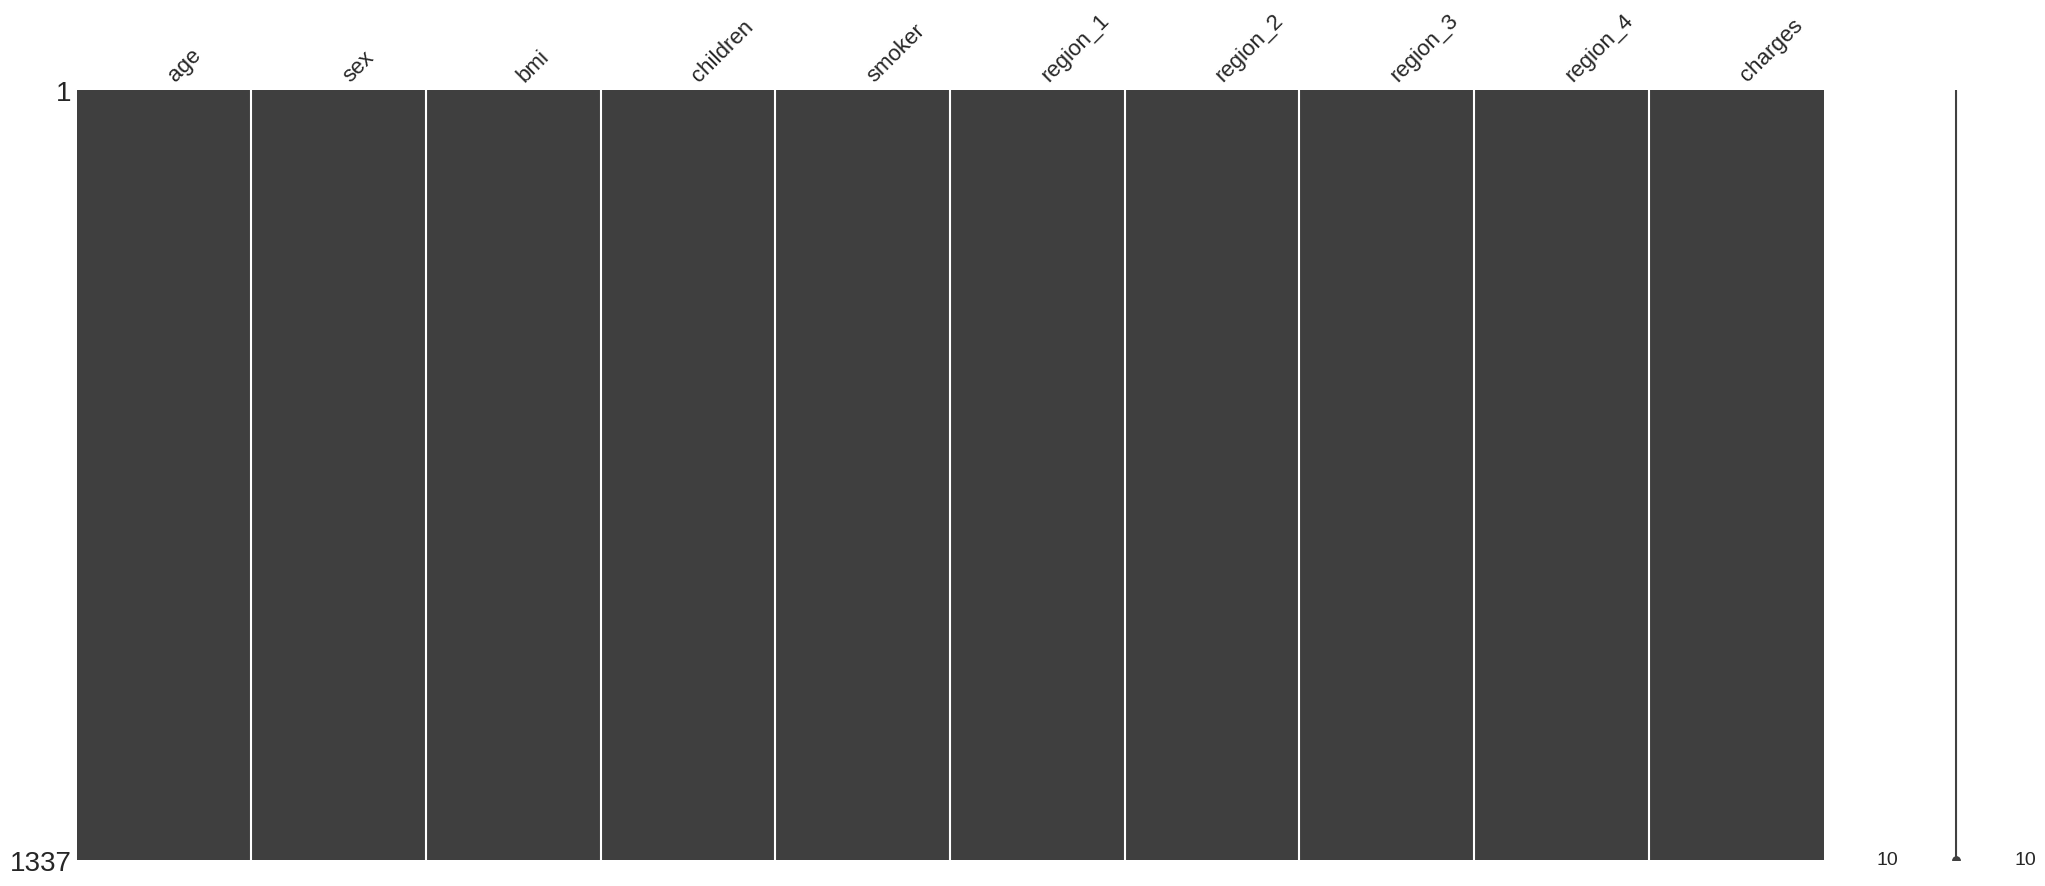

In [39]:
msno.matrix(df)

# 4. Duplicates

In [10]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob', 'David'],
    'Age': [24, 27, 24, 22, 27, 30],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'Miami']
}

df_1 = pd.DataFrame(data)

print("Original DataFrame:")
print(df_1)

# Remove duplicate rows, keeping the first occurrence
df_1_unique = df_1.drop_duplicates(keep='first')

print("\nDataFrame after removing duplicates (keeping first occurrence):")
print(df_1_unique)


Original DataFrame:
      Name  Age         City
0    Alice   24     New York
1      Bob   27  Los Angeles
2    Alice   24     New York
3  Charlie   22      Chicago
4      Bob   27  Los Angeles
5    David   30        Miami

DataFrame after removing duplicates (keeping first occurrence):
      Name  Age         City
0    Alice   24     New York
1      Bob   27  Los Angeles
3  Charlie   22      Chicago
5    David   30        Miami


In [11]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

1
0


# 4. Outliers

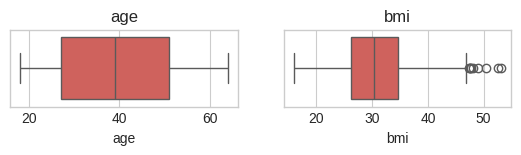

In [12]:
num_cols = ['age', 'bmi']
plt.figure(figsize=(10, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient="h",palette=sns.color_palette("Spectral"))
plt.show()

In [13]:
# Q1 = df["bmi"].quantile(.25)
# Q3 = df["bmi"].quantile(.75)
# IQR = Q3 - Q1
# upper = Q3 + 1.5 * IQR
# outliers = df[df["bmi"] > upper]["bmi"].values
# df["bmi"].replace(outliers, upper, inplace=True)

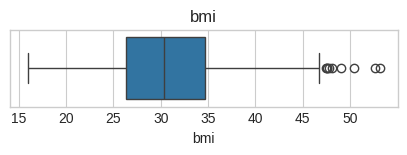

In [14]:
plt.figure(figsize=(5, 1))
plt.title("bmi")
sns.boxplot(df.bmi, orient="h")
plt.show()

In [15]:
def replace_outliers_with_fences(df, num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - 1.5 * IQR
        Upper_Fence = Q3 + 1.5 * IQR
        Lower_Outliers = df[df[col] < Lower_Fence][col].values
        Upper_Outliers = df[df[col] > Upper_Fence][col].values
        df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
        df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)
    return df

In [16]:
replace_outliers_with_fences(df,num_cols)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


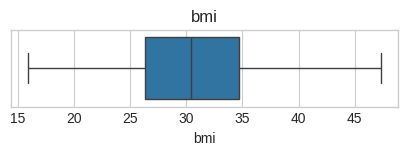

In [17]:
plt.figure(figsize=(5, 1))
plt.title("bmi")
sns.boxplot(df.bmi, orient="h")
plt.show()

# 5. Visualization

In [18]:
num_cols = ['age', 'bmi']
cat_cols = ['sex', 'children', 'smoker', 'region']

## Numerical  features

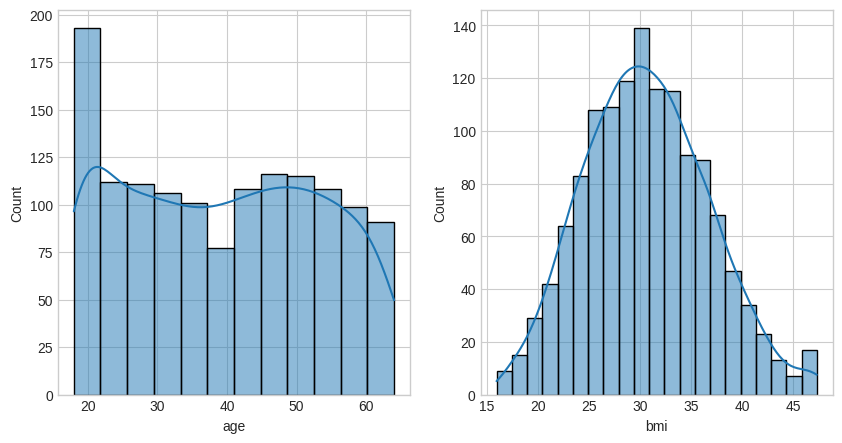

In [19]:
plt.figure(figsize=(10, 5))
for i,col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col], kde=True)
plt.show()

- Observations:
- The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, and with lowest age being 18 and highest being 64.
- There are no outlier values in the Age distribution in the data.

- Observations:
- The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.
- There are a total of 9 outlier values in the BMI distribution, all in the higher side. The highest BMI observed is 53.13.

## Categorical features

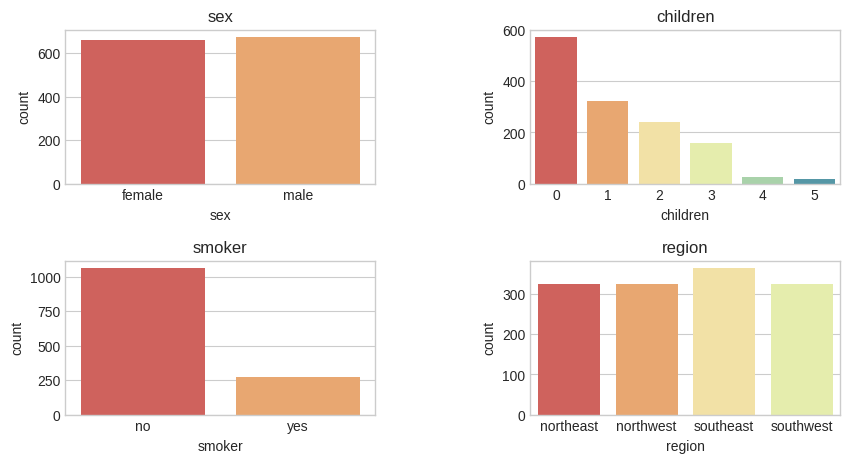

In [20]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.title(f"{col}")
    sns.countplot(x=col, data=df,palette=sns.color_palette("Spectral"))
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

### Check for relation between each feature & the targer

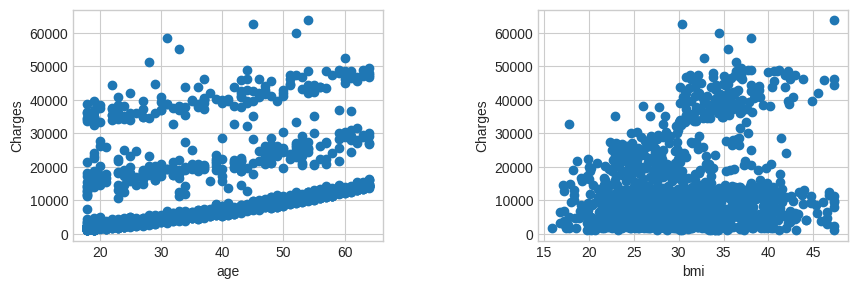

In [21]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    plt.scatter(df[col], df.charges)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

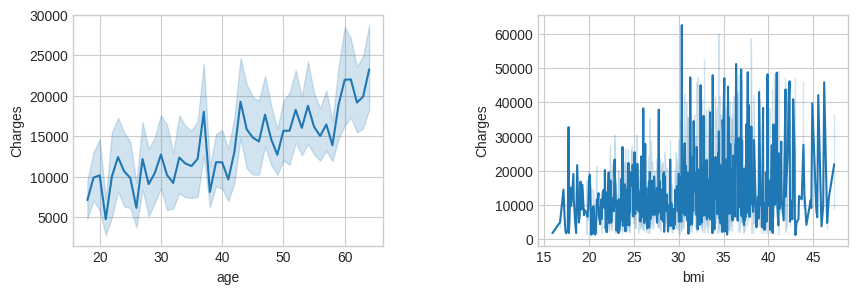

In [22]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x=df[col], y=df['charges'])
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

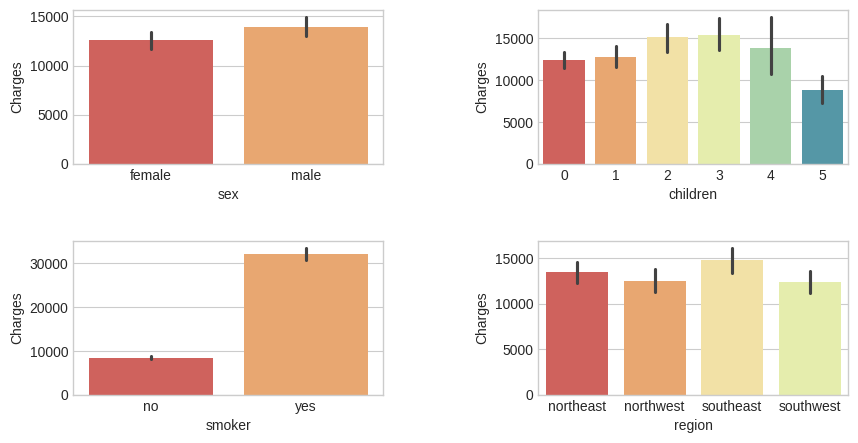

In [23]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    sns.barplot(x=col, y="charges", data=df,palette=sns.color_palette("Spectral"))
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

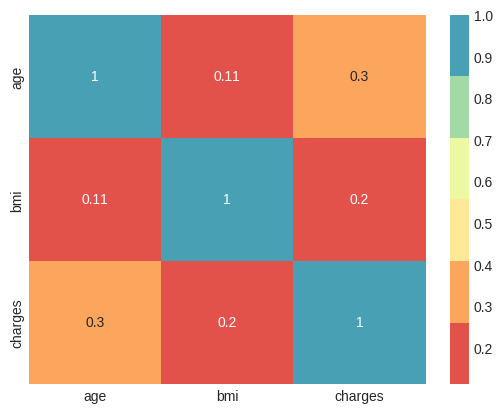

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap=sns.color_palette("Spectral"));

# 6. Encoding

In [25]:
pd.DataFrame({"Dtype":df.dtypes, "Num_Unique": df.nunique()}).T

,age,sex,bmi,children,smoker,region,charges
Dtype,int64,category,float64,category,category,category,float64
Num_Unique,47,2,540,6,2,4,1337


- **Ordinal Encoding**

In [26]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [27]:
from sklearn.preprocessing import OrdinalEncoder
cols_to_encode = ['sex', 'smoker']
categories = [['male', 'female'], ['yes', 'no']]
ordinal_encoder = OrdinalEncoder(categories=categories)
df[cols_to_encode] = ordinal_encoder.fit_transform(df[cols_to_encode])


In [28]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,southwest,16884.92400
1,18,0.0,33.770,1,1.0,southeast,1725.55230
2,28,0.0,33.000,3,1.0,southeast,4449.46200
3,33,0.0,22.705,0,1.0,northwest,21984.47061
4,32,0.0,28.880,0,1.0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,1.0,northwest,10600.54830
1334,18,1.0,31.920,0,1.0,northeast,2205.98080
1335,18,1.0,36.850,0,1.0,southeast,1629.83350
1336,21,1.0,25.800,0,1.0,southwest,2007.94500


- **One Hot Encoding**

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=["region"])
df = encoder.fit_transform(df)

In [31]:
df

,age,sex,bmi,children,smoker,region_1,region_2,region_3,region_4,charges
0,19,1.0,27.900,0,0.0,1,0,0,0,16884.92400
1,18,0.0,33.770,1,1.0,0,1,0,0,1725.55230
2,28,0.0,33.000,3,1.0,0,1,0,0,4449.46200
3,33,0.0,22.705,0,1.0,0,0,1,0,21984.47061
4,32,0.0,28.880,0,1.0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,1.0,0,0,1,0,10600.54830
1334,18,1.0,31.920,0,1.0,0,0,0,1,2205.98080
1335,18,1.0,36.850,0,1.0,0,1,0,0,1629.83350
1336,21,1.0,25.800,0,1.0,1,0,0,0,2007.94500


# 7. Splitting Data

In [32]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Class Data preprocessing

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder
class DataPreprocessor:
    def __init__(self, df):
        self.df = df

    def overview(self):
        return self.df.info()

    def check_missing_data(self):
        return self.df.isnull().sum()

    def columns_with_outliers(self, columns):
          outlier_columns = []
          for column in columns:
              q1 = self.df[column].quantile(0.25)
              q3 = self.df[column].quantile(0.75)
              iqr = q3 - q1
              lower_bound = q1 - 1.5 * iqr
              upper_bound = q3 + 1.5 * iqr
              outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
              if not outliers.empty:
                  outlier_columns.append(column)
          return outlier_columns

    def replace_outliers_with_fences(self, num_cols):
        for col in num_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            Lower_Fence = Q1 - 1.5 * IQR
            Upper_Fence = Q3 + 1.5 * IQR
            Lower_Outliers = self.df[self.df[col] < Lower_Fence][col].values
            Upper_Outliers = self.df[self.df[col] > Upper_Fence][col].values
            self.df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
            self.df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)
        return self.df

    def correlation_analysis(self):
        return self.df.corr(numeric_only=True)

    def data_info(self):
        cols = self.df.columns
        unique_val = [self.df[col].value_counts().head(10).index.to_numpy() for col in cols]
        n_uniques = [self.df[col].nunique() for col in cols]
        dtypes = [self.df[col].dtype for col in cols]
        nulss = [self.df[col].isnull().sum() for col in cols]
        dup = [self.df.duplicated().sum() for col in cols]
        return pd.DataFrame({
            'Col': cols,
            'dtype': dtypes,
            'n_uniques': n_uniques,
            'n_nan': nulss,
            'unique_val': unique_val,
            'duplicated': dup
        })

    def boxplot_numeric_columns(self):
        numeric_columns = self.df.select_dtypes(include=['number'])
        num_cols = len(numeric_columns.columns)
        plt.figure(figsize=(25, 5))
        for i, column in enumerate(numeric_columns.columns):
            plt.subplot(1, num_cols, i + 1)
            sns.boxplot(x=numeric_columns[column])
            plt.title(f'Box plot for {column}')
        plt.tight_layout()
        plt.show()

    def drop_duplicat(self, columns_uniques):
        index = self.df[self.df.drop(columns_uniques, axis=1).duplicated()].index
        print("Number of duplicated rows is", len(index))
        return self.df.drop(index, axis=0)

    def plot_histograms(self, num_cols):
        plt.figure(figsize=(10, 5))
        for i, col in enumerate(num_cols):
            plt.subplot(1, 2, i+1)
            sns.histplot(self.df[col], kde=True)
        plt.show()

    def plot_countplots(self, cat_cols):
        plt.figure(figsize=(10, 5))
        for i, col in enumerate(cat_cols):
            plt.subplot(2, 2, i+1)
            plt.title(f"{col}")
            sns.countplot(x=col, data=self.df, palette=sns.color_palette("Spectral"))
        plt.subplots_adjust(hspace=.5, wspace=.5)
        plt.show()

In [70]:
# Load the Tips dataset
tips = sns.load_dataset('tips')

# Create an instance of DataPreprocessor
preprocessor = DataPreprocessor(tips)

# Test the columns_with_outliers method
columns_with_outliers = preprocessor.columns_with_outliers(['total_bill', 'tip'])
print("Columns with outliers:", columns_with_outliers)


Columns with outliers: ['total_bill', 'tip']


In [72]:
# Test other methods
preprocessor.overview()
preprocessor.check_missing_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [74]:
preprocessor.replace_outliers_with_fences(['total_bill', 'tip'])

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01000,Female,No,Sun,Dinner,2
1,10.34,1.66000,Male,No,Sun,Dinner,3
2,21.01,3.50000,Male,No,Sun,Dinner,3
3,23.68,3.31000,Male,No,Sun,Dinner,2
4,24.59,3.61000,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.90625,Male,No,Sat,Dinner,3
240,27.18,2.00000,Female,Yes,Sat,Dinner,2
241,22.67,2.00000,Male,Yes,Sat,Dinner,2
242,17.82,1.75000,Male,No,Sat,Dinner,2


In [75]:
preprocessor.correlation_analysis()


,total_bill,tip,size
total_bill,1.000000,0.654450,0.604345
tip,0.654450,1.000000,0.503929
size,0.604345,0.503929,1.000000


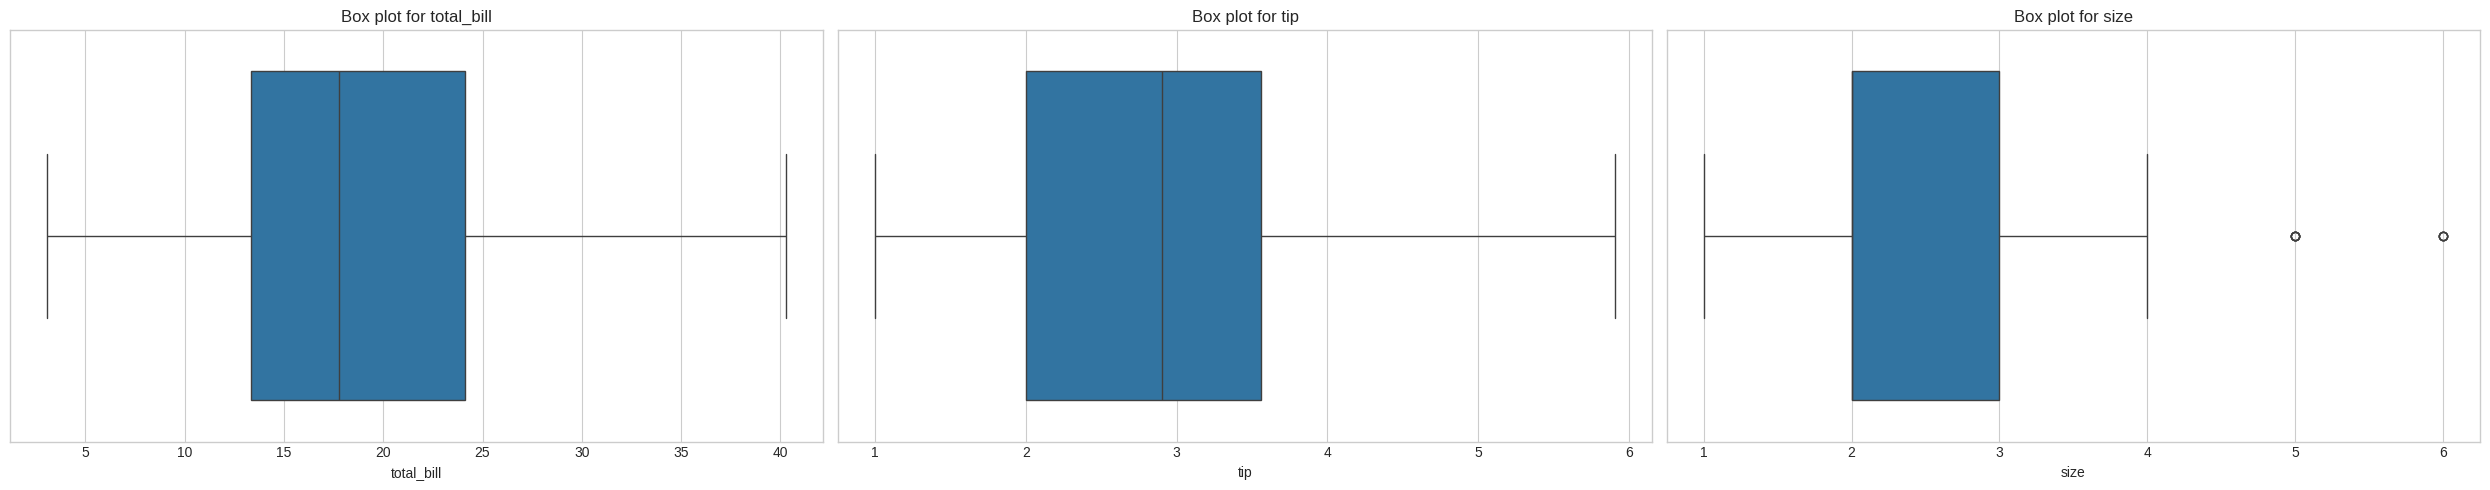

In [76]:
preprocessor.data_info()
preprocessor.boxplot_numeric_columns()

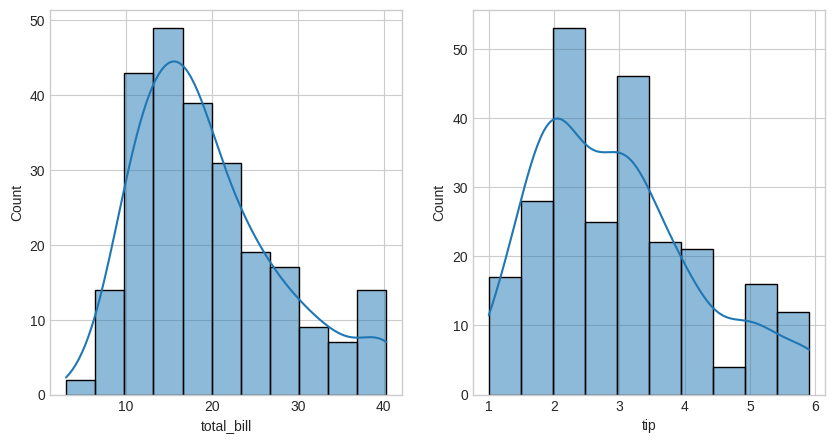

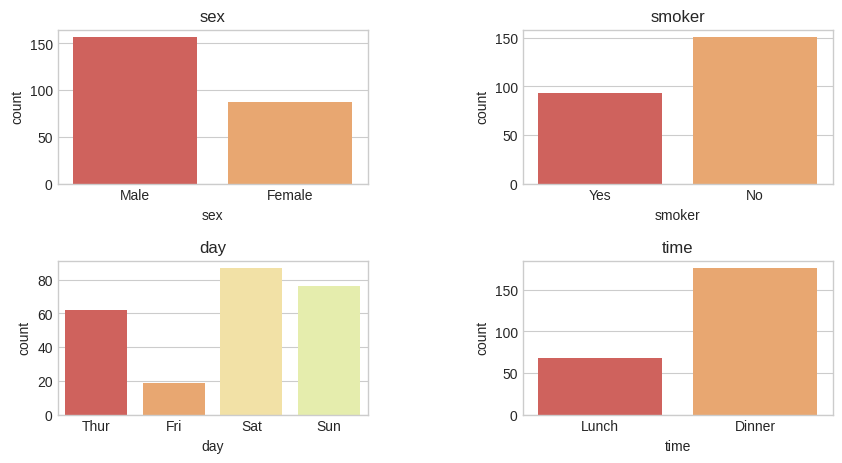

In [77]:
preprocessor.plot_histograms(['total_bill', 'tip'])
preprocessor.plot_countplots(['sex', 'smoker', 'day', 'time'])